
Temperature (°C) https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv

Topic https://data.worldbank.org/topic/climate-change

CO2 (kt) https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2) https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2) https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM) https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita) https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC


In [4]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
covid_19_data.csv		     poblacion.csv  test.pkl
GlobalLandTemperaturesByCountry.csv  test.csv	    test.xlsx
london_merged.csv		     test.hdf
Meteorite_Landings.csv		     test.json


In [41]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [9]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [10]:
idx = df_temp['year']> pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [15]:
df_t_avg = df_temp.groupby(['Country', pd.Grouper(key='year', freq='1Y')]).agg({'AverageTemperature': [np.mean, np.median]})

In [16]:
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

In [17]:
df_t_avg.xs('Mexico')

AverageTemperature         
                         mean   median
year                                  
1970-12-31          21.036182  21.5130
1971-12-31          20.640333  20.6605
1972-12-31          20.975000  22.1485
1973-12-31          20.496167  20.8200
1974-12-31          20.631500  21.0005
1975-12-31          20.449333  20.9585
1976-12-31          20.145667  20.3740
1977-12-31          20.841250  21.0620
1978-12-31          20.755500  21.2615
1979-12-31          20.569000  21.7240
1980-12-31          21.035667  20.7925
1981-12-31          20.753750  21.3770
1982-12-31          21.051083  21.7475
1983-12-31          20.675417  20.8315
1984-12-31          20.511500  21.3755
1985-12-31          20.603917  21.1995
1986-12-31          20.850667  21.6170
1987-12-31          20.455167  20.7800
1988-12-31          20.736083  21.4205
1989-12-31          20.965167  21.5890
1990-12-31          20.960833  21.4460
1991-12-31          20.839667  21.7415
1992-12-31          20.650333  21.2300
1993-12-31          20.938833  21.3560
1994-12-31          21.325750  21.5925
1995-12-31          21.370667  21.4765
1996-12-31          21.132167  21.2680
1997-12-31          20.898583  20.5115
1998-12-31          21.531750  21.7430
1999-12-31          21.128500  21.6755
2000-12-31          21.232083  21.6020
2001-12-31          21.133000  21.8235
2002-12-31          21.225000  22.3760
2003-12-31          21.329417  21.8635
2004-12-31          20.924833  21.5650
2005-12-31          21.413500  21.7915
2006-12-31          21.418083  22.3940
2007-12-31          21.079333  21.5400
2008-12-31          21.085250  21.7885
2009-12-31          21.546083  21.8915
2010-12-31          20.852917  21.3450
2011-12-31          21.599333  22.5915
2012-12-31          21.652417  22.3815
2013-12-31          22.219222  24.1130

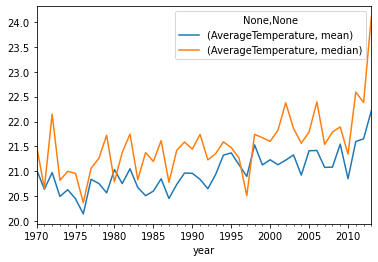

In [18]:
df_t_avg.xs('Mexico').plot()

In [22]:
df_tmed = df_t_avg['AverageTemperature'][['median']].reset_index()
df_tmed

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [23]:
df_tmed['date'] = df_tmed['year'].dt.year
df_tmed

,Country,year,median,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [25]:
df_tmed.rename(columns= {'median': 'Temp'}, inplace= True)
df_tmed

,Country,year,Temp,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [27]:
df_tpivot = df_tmed.pivot_table(values = 'Temp', index= 'date', columns = 'Country')
df_tpivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


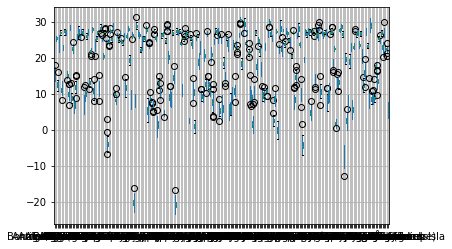

In [28]:
df_tpivot.boxplot()

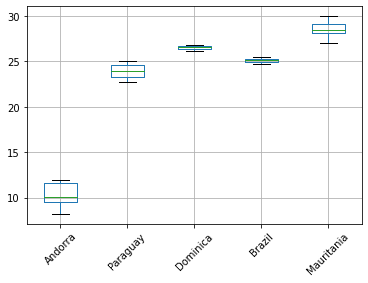

In [36]:
df_tpivot.T.sample(5).T.head().boxplot(rot=45)

API_AG.LND.AGRI.K2_DS2_en_csv_v2_3751801.csv	 Meteorite_Landings.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_3751799.csv	 poblacion.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv  test.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3830791.csv	 test.hdf
API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv	 test.json
covid_19_data.csv				 test.pkl
GlobalLandTemperaturesByCountry.csv		 test.xlsx
london_merged.csv


In [44]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_3751801.csv', header=2)

In [45]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_3751801.csv', header=2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_3751799.csv', header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv', header=2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3830791.csv', header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv', header=2)

In [46]:
range(1971, 2015)
map(str, range(1971, 2015))
cols = ['Country Name', 'Country Code']+list(map(str, range(1971, 2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [47]:
df_agri.loc[:,cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00
1,Africa Eastern and Southern,AFE,5360170.0,5365870.0,5366130.0,5367810.0,5371960.0,5374560.0,5374970.0,5385870.0,...,5294720.25,5309259.72,5324692.99,5356256.56,5380079.83,5398501.8,6392500.50,6459157.24,6477782.40,6497055.30
2,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.00,379100.00,379100.00,379100.00,379100.00,379110.0,379100.00,379100.00,379100.00,379100.00
3,Africa Western and Central,AFW,3102665.6,3060380.0,3111330.0,3064870.0,3060690.0,3066700.0,3023890.0,3013030.0,...,3480862.45,3481821.00,3497969.35,3524364.40,3536365.75,3551895.8,3559485.78,3574436.40,3594810.30,3597067.70
4,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,497366.95,502917.56,508468.17,514018.78,519569.39,525120.0,530670.62,536221.24,541771.86,547322.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,235230.00,236270.00,236270.00,235170.00,234520.00,235790.0,234520.00,235010.00,234990.00,234516.00
263,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,974830.00,968880.00,968900.00,971080.00,969880.00,968910.0,963740.00,963410.00,963410.00,963410.00
264,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,227620.00,230480.00,229840.00,230870.00,235860.00,234360.0,236360.00,238360.00,237360.00,238360.00


In [49]:
df_agri.loc[:,cols].melt(id_vars =['Country Name', 'Country Code']).rename(
    columns = {'variable':'date', 
               'Country Name':'Country', 
               'Country Code':'name',
               'value':'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [50]:
def fun_format(df, col= 'agriculture'):
  return df.loc[:,cols].melt(id_vars =['Country Name', 'Country Code']).rename(
      columns = {'variable':'date', 
                 'Country Name':'Country',
                 'Country Code':'name',
                 'value':col})


In [51]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu


,Country,name,date,population
0,Aruba,ABW,1971,59442.0
1,Africa Eastern and Southern,AFE,1971,175100167.0
2,Afghanistan,AFG,1971,11475450.0
3,Africa Western and Central,AFW,1971,123184308.0
4,Angola,AGO,1971,6041239.0
...,...,...,...,...
11699,Kosovo,XKX,2014,1812771.0
11700,"Yemen, Rep.",YEM,2014,25823488.0
11701,South Africa,ZAF,2014,54544184.0
11702,Zambia,ZMB,2014,15399793.0


In [52]:
df_tmed

,Country,year,Temp,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [53]:
df_popu['date'] = df_popu['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11704 non-null  object 
 1   name        11704 non-null  object 
 2   date        11704 non-null  float64
 3   population  11635 non-null  float64
dtypes: float64(2), object(2)
memory usage: 365.9+ KB


In [73]:
df_merge = pd.merge(df_tmed[['Country', 'Temp', 'date']],
                    df_popu, on =['Country', 'date'], how='inner')
df_merge

,Country,Temp,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475450.0
1,Afghanistan,13.8725,1972,AFG,11791222.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412960.0
4,Afghanistan,13.5130,1975,AFG,12689164.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0


In [74]:
df_merge = pd.merge(df_merge,df_co2e, on=['Country', 'date', 'name'], how='inner')
df_merge = pd.merge(df_merge,df_elec, on=['Country', 'date', 'name'], how='inner')
df_merge = pd.merge(df_merge,df_agri, on=['Country', 'date', 'name'], how='inner')
df_merge = pd.merge(df_merge,df_fore, on=['Country', 'date', 'name'], how='inner')
df_merge

,Country,Temp,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475450.0,1895.839,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791222.0,1532.806,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412960.0,1917.841,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689164.0,2126.860,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.000,585.457099,163000.0,179513.5
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.000,606.643960,162000.0,179052.8
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.000,636.248991,164000.0,178592.1
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.000,608.761669,162000.0,178131.4


In [78]:
df_climate = df_merge.dropna()
df_climate

,Country,Temp,date,name,population,co2,electricprod,agriculture,forest
62,Albania,13.4490,1990,ALB,3286542.0,6050.0,552.252185,11210.0,7888.0
63,Albania,11.5885,1991,ALB,3266790.0,4110.0,418.453589,11270.0,7868.5
64,Albania,13.5850,1992,ALB,3247039.0,2240.0,453.644074,11270.0,7849.0
65,Albania,13.6500,1993,ALB,3227287.0,2070.0,536.363825,11260.0,7829.5
66,Albania,13.2390,1994,ALB,3207536.0,2140.0,596.407959,11260.0,7810.0
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.0,585.457099,163000.0,179513.5
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.0,606.643960,162000.0,179052.8
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.0,636.248991,164000.0,178592.1
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.0,608.761669,162000.0,178131.4


In [84]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [85]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,979,791.3
United States   5,470,430.0
China           3,667,540.0
Japan           1,173,390.0
India             970,705.0
                    ...    
Suriname            1,500.0
Mozambique          1,500.0
Togo                1,430.0
Niger                 805.0
Eritrea               640.0
Name: co2, Length: 120, dtype: float64

In [90]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [95]:
df_max_co2 = df_climate[df_climate['Country'].isin(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,Temp,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","419,120.0","16,167.4","614,030.0","3,482,729.3"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","412,930.0","16,181.6","615,332.5","3,482,258.3"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","426,000.0","16,164.4","614,650.0","3,481,787.4"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","422,680.0","16,320.1","613,970.0","3,481,316.4"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","438,820.0","16,388.3","613,290.0","3,480,845.5"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,159,550.0","12,913.7","4,089,470.0","3,082,016.0"
7005,United States,10.2,2010,USA,"309,327,143.0","5,392,870.0","13,394.9","4,069,917.0","3,087,200.0"
7006,United States,9.5,2011,USA,"311,583,481.0","5,172,100.0","13,245.9","4,050,364.0","3,089,950.0"
7007,United States,9.9,2012,USA,"313,877,662.0","4,950,210.0","12,964.2","4,030,810.5","3,092,700.0"


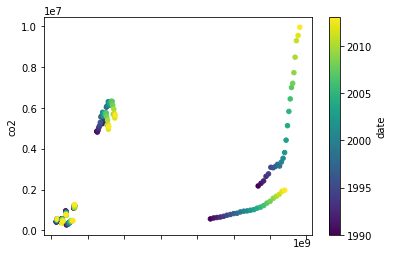

In [96]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis'
)

In [97]:
df_climate.corr()

,Temp,date,population,co2,electricprod,agriculture,forest
Temp,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.1,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.1,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


In [98]:
import seaborn as sns

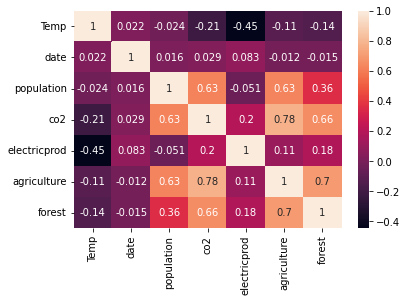

In [100]:
sns.heatmap(df_climate.corr(), annot=True)

In [101]:
df_med=df_climate.groupby('date').median()
df_med

,Temp,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,230,931.0","29,250.0","1,157.4","91,700.0","63,710.0"
1991,22.4,"10,346,663.5","27,345.0","1,072.5","91,870.0","63,349.1"
1992,19.9,"9,748,274.5","24,085.0","1,451.8","89,700.0","46,809.8"
1993,20.6,"9,877,647.0","24,080.0","1,520.3","83,965.0","45,837.1"
1994,20.5,"10,014,523.5","25,515.0","1,582.7","85,220.0","45,468.5"
1995,20.0,"10,081,493.5","27,300.0","1,606.4","77,575.0","44,901.8"
1996,19.9,"10,110,291.0","28,315.0","1,707.6","78,345.0","44,265.8"
1997,20.2,"10,113,205.0","28,945.0","1,782.6","79,280.0","43,629.8"
1998,21.2,"10,116,079.5","28,965.0","1,807.8","80,410.0","42,993.8"


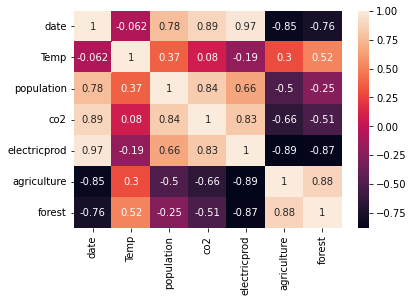

In [103]:
sns.heatmap(df_med.reset_index().corr(), annot=True)

In [104]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c9ddf1510>,
      dtype=object)

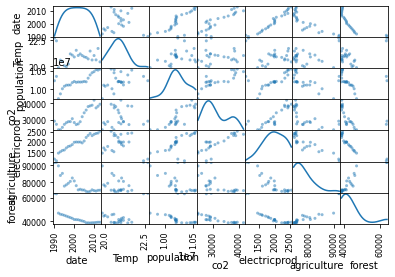

In [105]:
scatter_matrix(df_med.reset_index(), diagonal = 'kde')

In [106]:
from pandas.plotting import parallel_coordinates

In [107]:
df_samerica = df_climate[
                         df_climate['Country'].isin(['Colombia',
                                                     'Argentina',
                                                     'Bolivia',
                                                     'Mexico',
                                                     'Peru',
                                                     'Chile'])
][['Country',
   'Temp',
   'co2',
   'agriculture',
   'forest']]

df_samerica

,Country,Temp,co2,agriculture,forest
277,Argentina,15.4,"99,840.0","1,275,650.0","352,040.0"
278,Argentina,14.9,"105,320.0","1,276,600.0","350,214.0"
279,Argentina,14.9,"107,350.0","1,277,550.0","348,388.0"
280,Argentina,15.5,"111,030.0","1,278,500.0","346,562.0"
281,Argentina,15.0,"113,810.0","1,279,480.0","344,736.0"
...,...,...,...,...,...
5370,Peru,20.6,"41,680.0","239,460.0","741,746.0"
5371,Peru,20.5,"45,570.0","240,230.0","740,498.0"
5372,Peru,20.3,"48,580.0","241,040.0","738,787.5"
5373,Peru,20.6,"48,370.0","243,321.0","737,076.9"


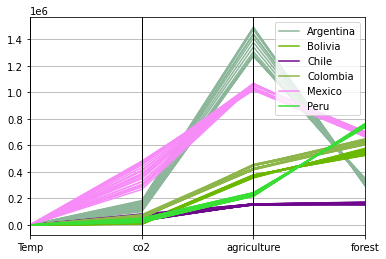

In [108]:
parallel_coordinates(df_samerica, 'Country')

In [110]:
[10,8]+[8,2]

[10, 8, 8, 2]

In [119]:
pd.NA | False



<NA>